# Convolutional Neural Networks (CNN)

## Konu Başlıkları
* [Python Kütüphaneleri](#1)
* [Veri Seti](#2)
* [Normalization - Reshape - Label Encoding](#3)
* [Train Test Split](#4)
* [Convolutional Neural Network](#5)
    * [What is Convolution Operation?](#6)
    * [Same Padding](#7)
    * [Max Pooling](#8)
    * [Flattening](#9)
    * [Full Connection](#10)
* [CNN Implementing with Keras](#11)
    * [Create Model](#12)
    * [Define Optimizer](#13)
    * [Compile Model](#14)
    * [Epochs and Batch Size](#15)
    * [Data Augmentation](#16)
    * [Fit the Model](#17)
    * [Evaluate the Model](#18)

<a id="1" ></a>
## Python Kütüphaneleri

In [1]:
import numpy as np
import pandas as pd

# görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

# uyarıları kapatma
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<a id="2" ></a>
## Veri Seti

In [2]:
# Eğitim veri seti

In [3]:
train = pd.read_csv("digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 42000 tane image
# 784 tane pixel var 28x28
# 1 tane label var, label image'imin hangi resim olduğunu gösteren sınıf
train.shape

(42000, 785)

* bir resmin sayısal karşılığı pikseller ile ifade edilir.
* makina resmi renklerinden anlar. renkler pikseller ile ifade edilir.
* bu veri setinde 28x28'den 784 tane piksel vardır.
* label resimde hangi sayının olduğunu belirtir. piksellerde sayının resmini oluşturur.
* label'ın sınıf 1'i resimde 1 sayısı olduğu anlamına gelir. 784 pikselin birleşimiyle 1 sayısı elde edilir.
* 784 tane piksel 28x28'lik bir matrix oluşturarak 4 sayısını oluşturur.

In [5]:
# Test veri seti

In [6]:
test = pd.read_csv("digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 28000 tane image
# 784 tane pixel var 28x28
test.shape

(28000, 784)

In [8]:
# bu verilerle CNN modeli eğitilecek
y_train = train["label"] # bağımlı değişken
x_train = train.drop(labels = ["label"], axis=1) # bağımsız değişkenler

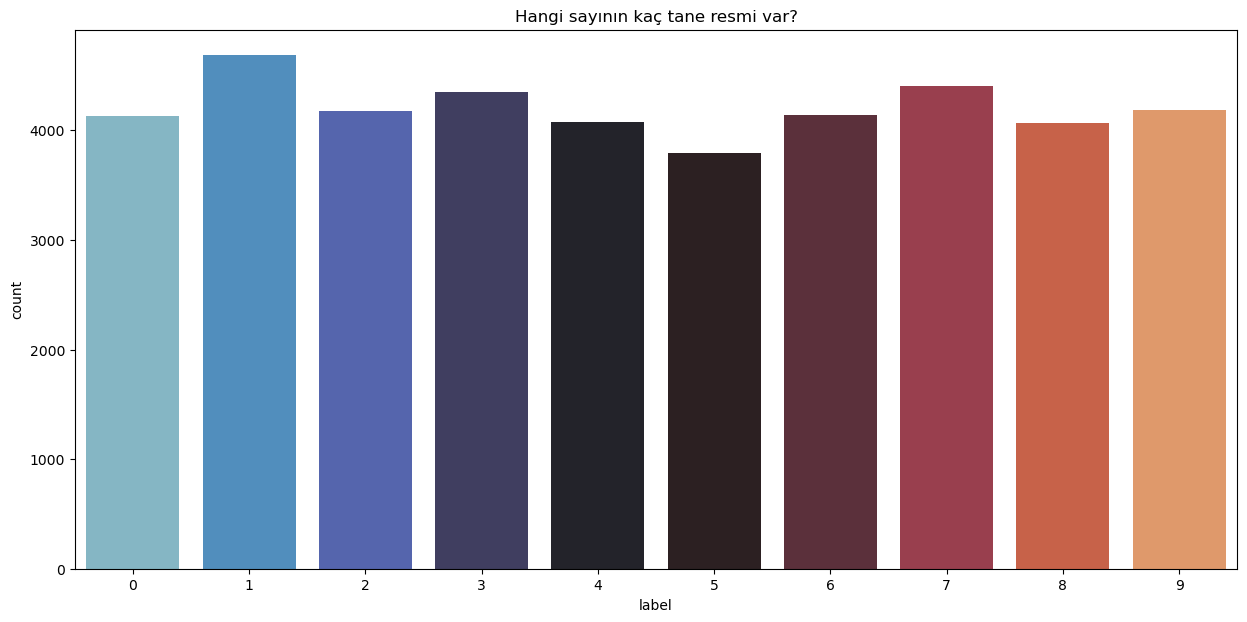

In [9]:
# dağılımı inceleyelim, hangi sayının kaç tane resmi var?
plt.figure(figsize = (15, 7))
sns.countplot(x=y_train, palette="icefire") # hangi sayıdan kaç tane var?
plt.title("Hangi sayının kaç tane resmi var?")
plt.show()

In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

4132 tane sıfır içeren resim varmış.

In [11]:
# veri setinin 0. satırındaki pikseller 1 sayısını oluşturuyordu
# bu bir sayısını görselleştirelim

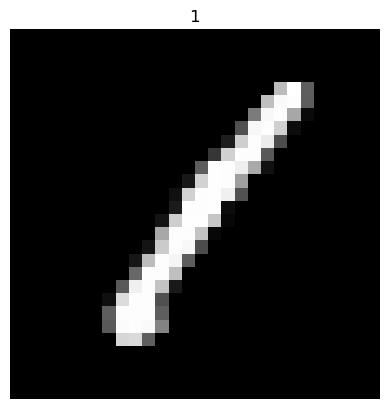

In [12]:
img = x_train.iloc[0].to_numpy() # matrix'e dönüştür
img = img.reshape((28, 28)) # matrix'i yeniden boyutlandır

# görselleştirme
plt.imshow(img, cmap="gray")
plt.title(train.iloc[0,0]) # train veri setinin 0.satır, 0. sütun(label) -> 1
plt.axis("off") # eksenleri gözükmesin
plt.show()

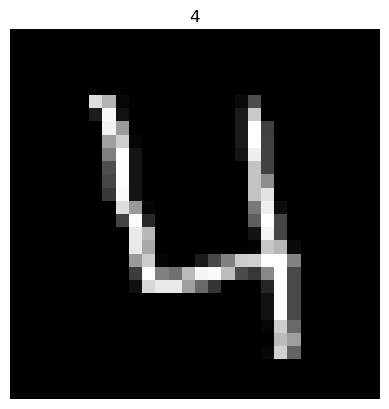

In [13]:
# 3. indeksteki satırı görselleştirelim
img = x_train.iloc[3].to_numpy() # matrix'e dönüştür
img = img.reshape((28,28)) # matrix'i yeniden boyutlandır

plt.imshow(img, cmap="gray")
plt.title(train.iloc[3,0]) # train veri setinin 3.satır, 1. sütun(label) -> 4
plt.axis("off") # eksenleri gözükmesin
plt.show()

<a id="3" ></a>
## Normalization - Reshape - Label Encoding

* Normalizasyon
    * Normalizasyon işlemi, resmin her bir pikselini 0 ile 1 arasında bir değere dönüştürmeyi içerir. Bu, her pikselin renk bileşenlerinin (genellikle 0 ile 255 arasında olan) uygun bir dönüşümle [0, 1] aralığına ölçeklendirilmesini ifade eder. Bu işlem, resimlerin işlenmesi ve analizi için kullanılır ve piksel değerlerini [0, 1] aralığına taşırken, renk bilgisini korur.
    * Normalizasyon CNN'in çalışmasını hızlandırır.
* Reshape
    * 28x28'lik resimleri 28x28x1 şeklinde 3D matrix yapmak zorundayız çünkü keras bu formatta çalışıyor. 28x28 piksel boyutundaki bir gri tonlu görüntüyü temsil etmek için genellikle 28x28x1 şeklinde bir 3D matris kullanılır. Bu matrisin son boyutu, kanal sayısını temsil eder ve gri tonlu görüntülerde yalnızca bir kanal vardır. Eğer renkli bir görüntü ile çalışıyorsanız, o zaman renk kanallarını temsil etmek için 28x28x3 bir 3D matris kullanmanız gerekir (örneğin, RGB renk uzayı için). Keras ve diğer derin öğrenme çerçeveleri, girdi verilerinin bu tür 3D matrislerle uyumlu olarak beklerler.
* Label Encoding
    * 0'dan 9'a kadar toplam 10 farklı rakam vardır. dolayısıyla 10 farklı sınıf vardır.

<!DOCTYPE html>
<html>
<head>
    <title>Label Encoding</title>
</head>
<body>
    <table>
        <tr>
            <th>Label</th>
            <th>0</th>
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>5</th>
            <th>6</th>
            <th>7</th>
            <th>8</th>
            <th>9</th>
        </tr>
        <tr>
            <th>0</th>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>1</th>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>2</th>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>3</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>4</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>5</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>6</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>7</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <th>8</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <th>9</th>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
        </tr>
    </table>
</body>
</html>

In [14]:
# Normalizasyon işlemi
x_train = x_train / 255.0 # bağımsız değişkenler
test = test / 255.0 # bağımsız değişkenler

In [15]:
print("x_train shape:", x_train.shape)
print("test shape:", test.shape)

x_train shape: (42000, 784)
test shape: (28000, 784)


In [16]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Bu kod, genellikle Keras veya benzeri derin öğrenme çerçevelerinde kullanılan veri hazırlama işlemi için kullanılır. Kod, verileri yeniden şekillendirir (reshape) ve genellikle görüntü verilerini uygun bir 4D tensör formatına getirmek için kullanılır.

Aşağıda her iki satırın ne yaptığını açıklayan ayrıntılı bir açıklama bulunmaktadır:

1. `x_train` ve `test` veri setlerinin `.values` özelliği kullanılarak DataFrame veya başka bir veri yapısından NumPy dizilerine dönüştürülür. Bu, verilerin daha sonra NumPy dizileri üzerinde işlem yapmak için kullanılabilir hale gelmesini sağlar.

2. `.reshape(-1, 28, 28, 1)` kodu, her iki veri setini 4D tensör formatına dönüştürür. Burada:
   - `-1`: Bu, otomatik olarak boyutu belirlemesi için bir yer tutucudur. Yani, bu boyuta otomatik olarak uygun boyut atanır.
   - `28, 28`: Görüntülerin genişliği ve yüksekliği, bu örneklerde 28 pikseldir.
   - `1`: Bu, kanal sayısını temsil eder. Genellikle gri tonlu görüntüler için 1 olarak ayarlanır çünkü bunlar sadece tek bir renk kanalına sahiptir. Renkli görüntüler için ise genellikle 3 olarak ayarlanır çünkü bunlar üç renk kanalına (RGB) sahiptir.

Sonuç olarak, her iki veri seti artık 4D tensörlerdir ve bu format, derin öğrenme modellerine girdi olarak veri sağlamak için kullanılır. Bu kod aynı zamanda veriyi uygun bir şekilde yeniden şekillendirirken renk bilgisini korur, çünkü gri tonlu görüntülerde sadece bir kanal kullanılır ve renkli görüntülerde üç kanal kullanılır.

In [17]:
print("x_train shape:", x_train.shape)
print("test shape:", test.shape)

x_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [18]:
# Label Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes =10)
y_train[:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<a id="4" ></a>
## Train Test Split

normalde veri setini test ve train veri seti olarak 2'ye ayırırız.

bu bir gerçek hayat problemi olduğundan yani test veri setinin label(bağımlı değişkeni) sütunu olmadığından train veri setini train ve validation olarak 2'ye ayırıyorum. 

bu bir gerçek hayat problemi olduğundan train veri setini train ve validation olarak 2'ye ayırıyorum. train ile model eğitilir, validation ile doğrulama yapılır yani model test edilir ve en sonunda test veri setindeki image'ler tahmin edilir.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.1, # veri setinin %10'u validation seti olacak
                                                 random_state = 2) # veri seti her seferinde aynı şekilde böler

In [21]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_val.shape)

x_train shape: (37800, 28, 28, 1)
x_test shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_test shape: (4200, 10)


In [22]:
x_train[4].shape

(28, 28, 1)

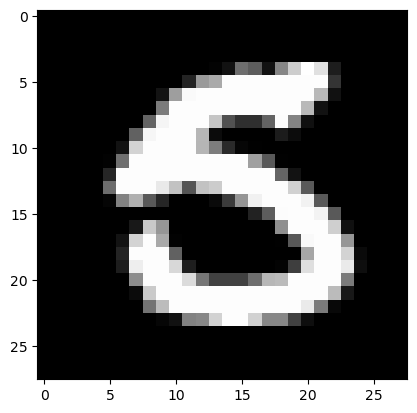

In [23]:
plt.figure()
plt.imshow(x_train[4][:,:,0], cmap="gray")
plt.show()

<a id="5" ></a>
## Convolutional Neural Network

CNN'i görüntü sınıflandırmak için kullanırız.

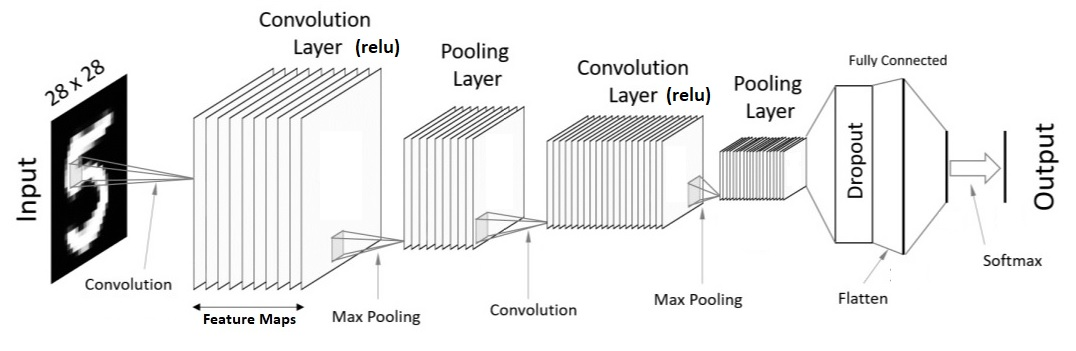

### Convolution

#### Feature Detector
* bir resim olsun ve 3x3'lük bir feature detector olsun
* feature detector, resim üzerindeki resimi ayırt etmeyi sağlayacak feature'ları tespit etme, bulmaya yarayan matrixler
* matrix boyutu farklı olabilir. 3x3, 4x4... boyutu bir hiperparameterdir
* feature detector = kernel = filter
* Feature detector(Özellik algılayıcı), kenarlar veya dışbükey şekiller gibi özellikleri algılar. Örneğin, girişi köpek ise, özellik dedektörü köpeğin kulağı veya kuyruğu gibi özellikleri tespit edebilir.
* belirli başlı özellikler var. bu özellikler sınıfı ayırt etmeye yarar bu özellikleri kullanarak filtre yapılacak ve filtrelenmiş özellikleri kullanarak sınıflandırma yapılır.
* feature detector(filtre), resimin üzerindeki feature'ları yani karmaşık şekilleri ya da basit kenarları tespit eder. resimde filtre kullanarak tespit edilen özelliklerdir.
* kediyi feature detector ile tespit edilecek. kedinin gözünü yani özelliğini(feature) tespit eder.

#### Feature Map
* feature detector ile convolution yapar ve ortaya çıkan yeni convole edilmiş özelliklere Feature Map denir.
* filtre, resim üzerinde bir convolution yapar

#### Stride
* Adım: giriş görüntüsünde gezinme.

Resmin boyutunu küçültüyoruz. Bu önemlidir çünkü kod daha hızlı çalışır. Ancak bilgileri kaybettik. orijinal resimden feature map'e geçiş

Birden fazla özellik algılayıcısı (filtre) kullandığımız için birden fazla özellik haritası oluşturuyoruz. filtrenin bir tanesi köpeğin kulağını tespit edecek bu filtreyi resime uyguladığımda köpeğin kulağının tespit edilmiş feature map'ı oluşacak bu şekilde birden fazla filtre vardır ve buna bağlı olarak birden fazla feature map oluşur.

birden fazla filtre kullandığımızdan birden fazla feature map oluşur.

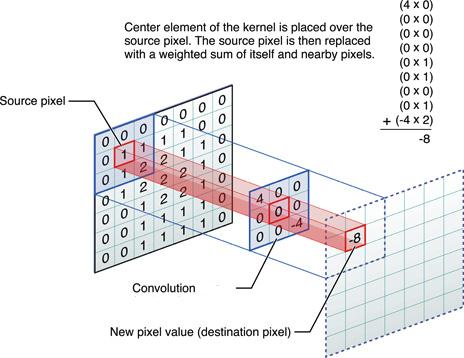

* "Feature map, resimdeki belirli özelliklerin (örneğin, köpeğin kuyruğu gibi) tespit edildiği bir görsel temsilidir."
* "Feature Detector, köpeğin kuyruğunu tespit etmek için kullanılan özel bir algoritma veya işlemi ifade eder."
* Feature map, belirli bir özellik dedektörünün (örneğin, kuyruğu tespit eden bir özellik dedektörü) sonucunda elde edilen görsel bir temsilidir.

Feature map ve Feature Detector, genellikle sinir ağı tabanlı görüntü işleme (convolutional neural networks - CNNs) veya benzeri makine öğrenimi tekniklerinde kullanılan terimlerdir.

1. **Feature Detector (Özellik Dedektörü):** Bir görüntüde belirli bir özelliği veya deseni tespit etmeye yönelik bir algoritma veya işlemi temsil eder. Örneğin, köpeğin kuyruğunu tespit etmek için bir özellik dedektörü, kuyruğun karakteristik özelliklerini (şekil, renk, desen vb.) tanımak için tasarlanmış bir algoritma olabilir. Feature detector, genellikle bir dizi öğrenme yöntemi kullanarak belirli özellikleri tanımak için eğitilir.

2. **Feature Map (Özellik Haritası):** Feature map, bir görüntü veya veri seti üzerinde özellik dedektörlerinin uygulandığı sonucu ifade eden bir matris veya görüntüdür. Yani, özellik dedektörleri tarafından tespit edilen belirli özelliklerin görsel temsili olarak düşünülebilir. Örneğin, köpeğin kuyruğunu tespit eden bir özellik dedektörü, bir görüntünün belirli bölgelerinde kuyruğun varlığını gösteren bir özellik haritası oluşturur. Bu harita, kuyruğun nerede olduğunu belirten bir görsel bilgi sağlar.

Genel olarak, CNN'ler gibi görüntü işleme modelleri, özellik dedektörleri kullanarak verileri analiz eder ve bu dedektörlerin sonuçlarından oluşturulan özellik haritaları üzerinden daha karmaşık görevleri gerçekleştirir. Özellik haritaları, aynı zamanda özelliklerin hiyerarşik olarak öğrenilmesine izin verir ve sonunda daha karmaşık nesnelerin ve desenlerin tespit edilmesine yardımcı olabilir.

In [ ]:
## çizgileri tespit eden filtre(feature detector): Edge detect
# Edge detect: [0, 10, 0],[10,-4,10][0,10,0]
# 3x3'lük bir matrix

ReLU bir aktivasyon fonksiyonudur. bu nonlinearity'yi arttırır yani karmaşıklığı arttırır. resimler nonlinear olduğundan karmaşık yapılar olduğundan ReLU kullanmak nonlinearity'yi arttırır.
feature map'e ReLU uygulanır ve karmaşıklık artar.

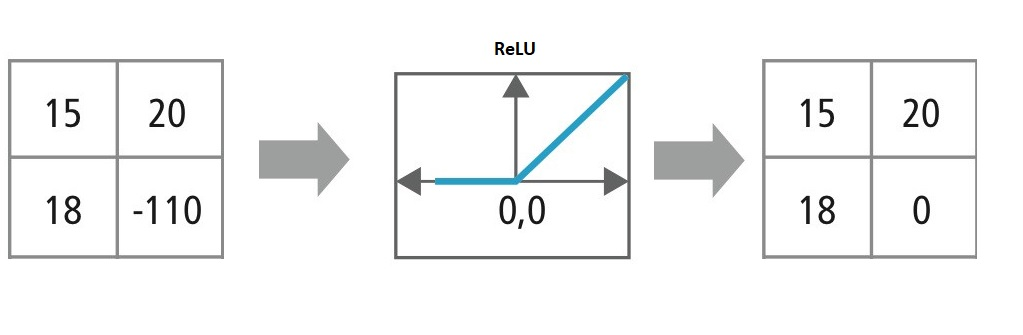

### Same Padding

Convolution yaptıktan sonra feature map'in boyutu, orijinal resimin boyutundan küçük olmuştu ve veri kaybedilmişti. Bu veri kaybını engellemek için padding metodu kullanılır.
same padding metodunu kullanırsak sonuçta padding edilmiş matrix, orijinal resimin boyutuna eşittir.

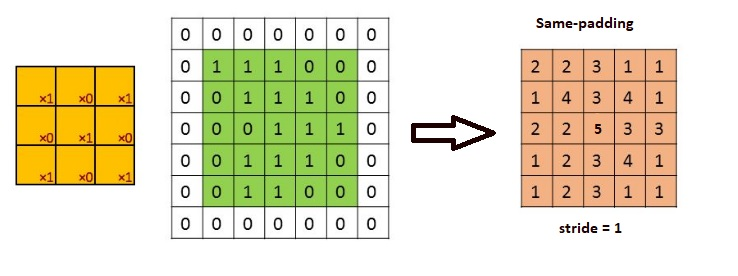

yeşil kare bir resimdir. bu resime 0'lar ile bir çerçeve çizilir. sarı renkli matrix filtredir(feature detector). bu filtre çerçeveli yeşil resimin üzerinde stride 1 olacak şekilde gezdirilir ve oluşan feature map, orijinal resimin boyutuyla aynıdır ve bilgi kaybını azalır.

### Max Pooling

* boyut(size) büyük olursa yavaş çalışır. accuracy değeri yüksek olsun ve yavaş çalışmasın. down-sampling ya da sub-sampling
* kedi sınıflandırmanın dışındaysa sınıflandırmayı etkilememesi için max pooling yapılır
* overfitting aşırı ezberlemedir. veri ezberlenirse örneğin van kedisi ezberlenirse ve ankara kedisi sorulursa kedi tahmin edilmez çünkü van kedisi ebzerlenmiştir. bunu engellemek için pooling yapılır.

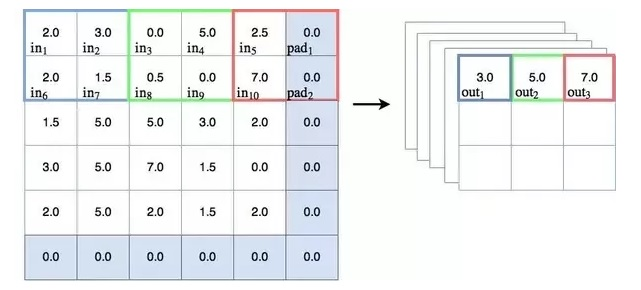

### Flattening

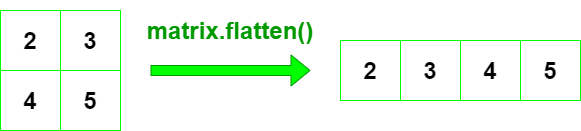

### Full Connection

Tamamen bağlantılı (full connection) bir katman, bir sinir ağı katmanı türüdür. Bu katmandaki nöronlar, bir önceki katmandaki tüm aktivasyonlarla bağlantıya sahiptir, yani her nöron bir önceki katmandaki tüm nöronlardan gelen sinyallere sahiptir.

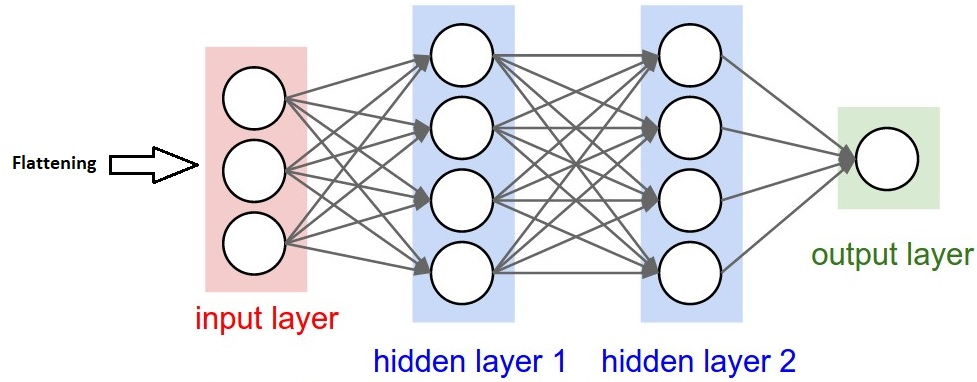

## CNN Implementing with Keras